In [1]:
# Importation de la bibliothèque yfinance pour accéder aux données financières de Yahoo Finance
import yfinance as yf

# Importation de pandas pour la manipulation et l'analyse des données sous forme de DataFrame
import pandas as pd

# Importation de la classe date du module datetime pour travailler avec les dates
from datetime import date

In [2]:
# Définir la date de début pour la période de téléchargement des données
start = '2000-01-01'

# Définir la date de fin comme la date actuelle
end = date.today()

# Définir le symbole boursier pour Apple Inc.
stock = 'AAPL'

# Télécharger les données boursières pour Apple entre les dates définies
data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [7]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.844981,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.773741,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.785063,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.717125,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.751094,460734400
...,...,...,...,...,...,...
2024-06-20,213.929993,214.240005,208.850006,209.679993,209.679993,86172500
2024-06-21,210.389999,211.889999,207.110001,207.490005,207.490005,246421400
2024-06-24,207.720001,212.699997,206.589996,208.139999,208.139999,80727000


In [8]:
# Sélectionner les colonnes 'Close' (prix de clôture) et 'Volume' dans les données téléchargées
df = data[['Close', 'Volume']]
df

,Close,Volume
Date,,
2000-01-03,0.999442,535796800
2000-01-04,0.915179,512377600
2000-01-05,0.928571,778321600
2000-01-06,0.848214,767972800
2000-01-07,0.888393,460734400
...,...,...
2024-06-20,209.679993,86172500
2024-06-21,207.490005,246421400
2024-06-24,208.139999,80727000


In [4]:
# Importer la bibliothèque matplotlib.pyplot pour créer des visualisations
import matplotlib.pyplot as plt

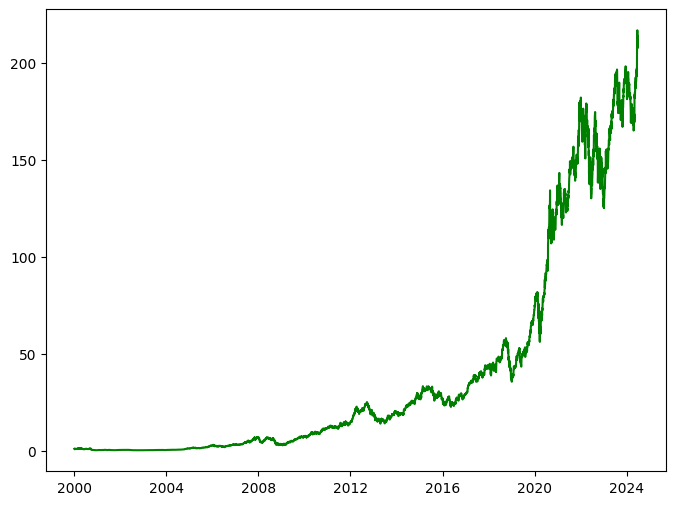

In [10]:
# Créer une nouvelle figure avec une taille de 8x6 pouces
plt.figure(figsize=(8,6))

# Tracer le prix de clôture ('Close') de l'action Apple en utilisant la couleur verte ('g')
plt.plot(data.Close, 'g')

# Afficher le graphique
plt.show()

In [9]:
# Ajouter une nouvelle colonne 'Target' au DataFrame en décalant les valeurs de la colonne 'Close' d'une ligne vers le haut
df = df.assign(Target=df['Close'].shift(-1))
df

,Close,Volume,Target
Date,,,
2000-01-03,0.999442,535796800,0.915179
2000-01-04,0.915179,512377600,0.928571
2000-01-05,0.928571,778321600,0.848214
2000-01-06,0.848214,767972800,0.888393
2000-01-07,0.888393,460734400,0.872768
...,...,...,...
2024-06-20,209.679993,86172500,207.490005
2024-06-21,207.490005,246421400,208.139999
2024-06-24,208.139999,80727000,209.070007


In [10]:
# Supprimer les lignes contenant des valeurs manquantes (NaN)
df = df.dropna()
df

,Close,Volume,Target
Date,,,
2000-01-03,0.999442,535796800,0.915179
2000-01-04,0.915179,512377600,0.928571
2000-01-05,0.928571,778321600,0.848214
2000-01-06,0.848214,767972800,0.888393
2000-01-07,0.888393,460734400,0.872768
...,...,...,...
2024-06-18,214.289993,79943300,209.679993
2024-06-20,209.679993,86172500,207.490005
2024-06-21,207.490005,246421400,208.139999


In [11]:
# Sélectionner les colonnes 'Close' et 'Volume' comme variables d'entrée (X)
x = df[['Close', 'Volume']]

# Sélectionner la colonne 'Target' comme variable cible (y)
y = df['Target']

In [12]:
# Importer la fonction train_test_split pour diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

# Importer le modèle de régression linéaire
from sklearn.linear_model import LinearRegression

# Importer la fonction mean_squared_error pour évaluer les performances du modèle
from sklearn.metrics import mean_squared_error

In [13]:
# Diviser les données en ensembles d'entraînement et de test
# x_train et y_train sont les ensembles d'entraînement pour les variables d'entrée et cible, respectivement
# x_test et y_test sont les ensembles de test pour les variables d'entrée et cible, respectivement
# La taille de l'ensemble de test est de 20% de l'ensemble de données, et random_state est fixé à 42 pour la reproductibilité
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
# Importer GridSearchCV pour la recherche des meilleurs hyperparamètres
from sklearn.model_selection import GridSearchCV

In [15]:
# Définir la grille des hyperparamètres à rechercher
param_grid = {
    'fit_intercept': [True, False],  # Rechercher les valeurs True et False pour l'hyperparamètre fit_intercept
}

In [16]:
# Créer un objet GridSearchCV pour la recherche des meilleurs hyperparamètres
# Le modèle utilisé est une régression linéaire, et la grille des hyperparamètres est param_grid
# cv=5 spécifie une validation croisée à 5 plis
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)

In [17]:
# Effectuer la recherche des meilleurs hyperparamètres sur les données d'entraînement
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

In [18]:
# Obtenir le meilleur modèle trouvé par GridSearchCV
best_model = grid_search.best_estimator_

In [19]:
import joblib
from google.colab import files

In [20]:
# Sauvegarder le meilleur modèle
joblib.dump(best_model, 'ml_model.pkl')

['ml_model.pkl']

In [21]:
# Télécharger le fichier sur mon PC local
files.download('ml_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
# Faire des prédictions sur l'ensemble de test en utilisant le meilleur modèle
predictions = best_model.predict(x_test)

In [23]:
# Calculer l'erreur quadratique moyenne entre les valeurs réelles et les prédictions
mse = mean_squared_error(y_test, predictions)

# Afficher l'erreur quadratique moyenne
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.8091171949531537


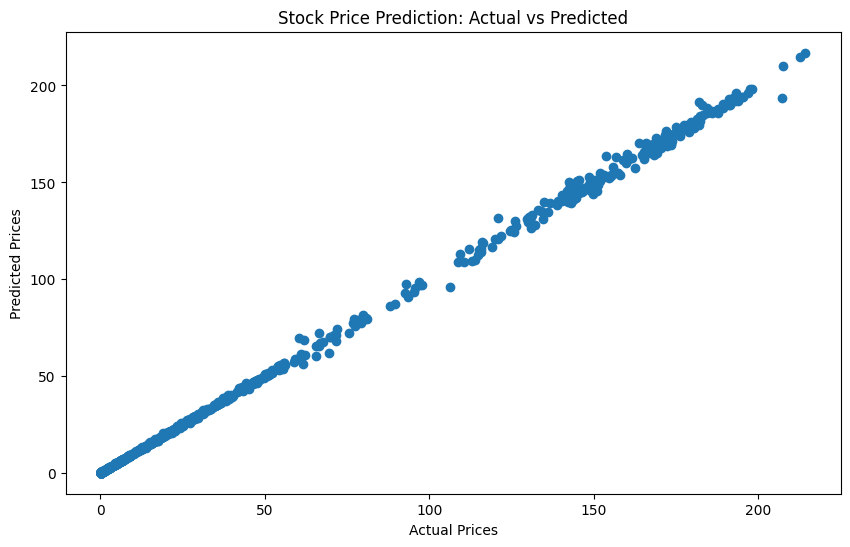

In [24]:
# Créer une nouvelle figure avec une taille de 10x6 pouces
plt.figure(figsize=(10, 6))

# Créer un nuage de points avec les valeurs réelles (y_test) en abscisse et les prédictions en ordonnée
plt.scatter(y_test, predictions)

# Définir le label de l'axe des x
plt.xlabel('Actual Prices')

# Définir le label de l'axe des y
plt.ylabel('Predicted Prices')

# Définir le titre du graphique
plt.title('Stock Price Prediction: Actual vs Predicted')

# Afficher le graphique
plt.show()

In [25]:
# Réinitialiser l'index du DataFrame pour le rendre continu après des opérations de suppression de lignes ou autres
data.reset_index(inplace=True)

In [11]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.844981,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.773741,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.785063,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.717125,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.751094,460734400
...,...,...,...,...,...,...
2024-06-20,213.929993,214.240005,208.850006,209.679993,209.679993,86172500
2024-06-21,210.389999,211.889999,207.110001,207.490005,207.490005,246421400
2024-06-24,207.720001,212.699997,206.589996,208.139999,208.139999,80727000


In [12]:
# Calculer la moyenne mobile sur 100 jours des prix de clôture
ma_100_days = data.Close.rolling(100).mean()

# Afficher la série de la moyenne mobile sur 100 jours
ma_100_days

Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
                ...   
2024-06-20    181.9953
2024-06-21    182.1529
2024-06-24    182.3539
2024-06-25    182.6006
2024-06-26    182.8645
Name: Close, Length: 6159, dtype: float64

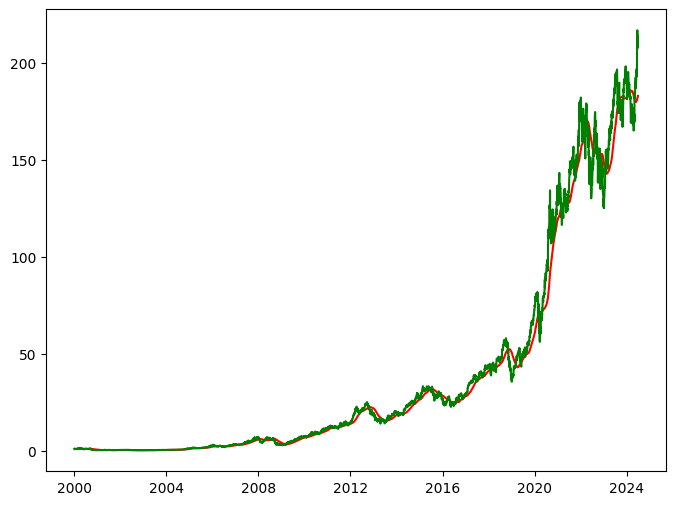

In [13]:
# Créer une nouvelle figure avec une taille de 8x6 pouces
plt.figure(figsize=(8,6))

# Tracer la moyenne mobile sur 100 jours en rouge ('r')
plt.plot(ma_100_days, 'r')

# Tracer les prix de clôture en vert ('g')
plt.plot(data.Close, 'g')

# Afficher le graphique
plt.show()

In [14]:
# Supprimer les lignes contenant des valeurs manquantes (NaN) du DataFrame
data.dropna(inplace=True)

In [15]:
# Créer un DataFrame contenant les données de clôture pour l'ensemble d'entraînement (80% des données)
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])

# Créer un DataFrame contenant les données de clôture pour l'ensemble de test (20% des données)
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [16]:
data_train.tail()

,Close
Date,
2019-07-29,52.419998
2019-07-30,52.195000
2019-07-31,53.259998
2019-08-01,52.107498
2019-08-02,51.005001


In [17]:
data_test.head()

,Close
Date,
2019-08-05,48.334999
2019-08-06,49.250000
2019-08-07,49.759998
2019-08-08,50.857498
2019-08-09,50.247501


In [18]:
# Importer la classe MinMaxScaler pour mettre à l'échelle les données
from sklearn.preprocessing import MinMaxScaler

# Créer une instance de MinMaxScaler avec une plage de valeurs entre 0 et 1
scaler = MinMaxScaler(feature_range=(0, 1))

In [19]:
# Mettre à l'échelle les données d'entraînement en utilisant le MinMaxScaler
data_train_scale = scaler.fit_transform(data_train)

In [20]:
data_train_scale

array([[0.01324184],
       [0.01178358],
       [0.01201534],
       ...,
       [0.91766634],
       [0.8977211 ],
       [0.87864122]])

In [21]:
# Importer la bibliothèque numpy pour les opérations numériques
import numpy as np

In [22]:
# Utiliser la fonction np.shape pour obtenir les dimensions du tableau data_train_scale
np.shape(data_train_scale)

(4927, 1)

In [23]:
x = list()
y = list()

In [24]:
# Parcourir les données d'entraînement mises à l'échelle à partir de l'indice 100 jusqu'à la fin
for i in range(100, data_train_scale.shape[0]):
    # Ajouter les 100 données précédentes en tant qu'entrée (x)
    x.append(data_train_scale[i-100:i])
    # Ajouter la donnée actuelle comme sortie (y)
    y.append(data_train_scale[i, 0])

In [25]:
# Convertir les listes x et y en tableaux numpy
x = np.array(x)
y = np.array(y)

In [26]:
# Installer la bibliothèque torchviz pour la visualisation des graphes PyTorch
!pip install torchviz

# Installer le logiciel Graphviz pour la visualisation des graphes
!apt-get -qq install -y graphviz

In [27]:
# Importer les modules nécessaires de PyTorch pour la création de réseaux de neurones
import torch
import torch.nn as nn

# Importer la fonction make_dot de torchviz pour la visualisation des graphes de calcul
from torchviz import make_dot

# Importer la classe Image du module IPython.display pour afficher les images dans le notebook
from IPython.display import Image

In [28]:
input_size = 10
hidden_size = 20
num_layers = 2
batch_size = 1
seq_len = 5

In [1]:
!pip install tensorflow==2.16.1

In [2]:
import tensorflow as tf

In [4]:
# Importer les couches nécessaires de Keras pour construire des modèles de réseaux de neurones
from keras.layers import Dense, Dropout, LSTM

# Importer la classe Sequential de Keras pour créer des modèles de réseaux de neurones séquentiels
from keras.models import Sequential

In [29]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMModel, self).__init__()
        # Initialise une couche LSTM avec les paramètres spécifiés
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

    def forward(self, x):
        # Passe la séquence d'entrée x à travers la couche LSTM
        out, _ = self.lstm(x)
        return out

In [33]:
# Crée un tenseur avec des valeurs aléatoires
x = torch.randn(batch_size, seq_len, input_size)

In [34]:
# Crée une instance du modèle LSTM
lstm_model = LSTMModel(input_size, hidden_size, num_layers)

In [35]:
# Suppose que x2 est un tenseur de la forme (batch_size, seq_len, input_size)
out = lstm_model(x)

In [36]:
# Crée un graphique de flux de graphe du calcul de la moyenne de la sortie
dot = make_dot(out.mean(), params=dict(list(lstm_model.named_parameters())))

# Définit le format de sortie en PNG
dot.format = 'png'

# Enregistre le graphique sous le nom "lstm_model.png"
dot.render("lstm_model")

'lstm_model.png'

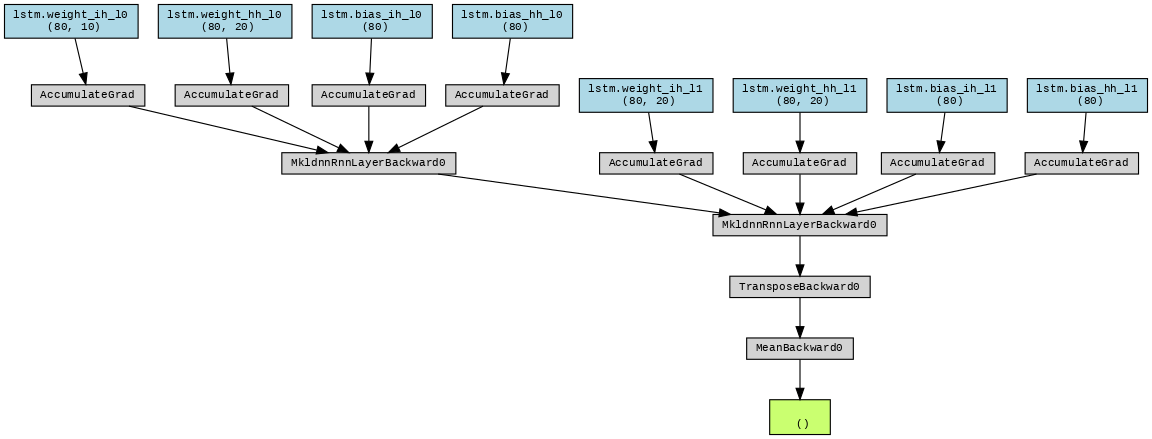

In [37]:
# Affiche l'image lstm_model.png
Image(filename="lstm_model.png")

In [38]:
# Crée un modèle séquentiel
model = Sequential()

# Ajoute une couche LSTM avec 50 unités, une fonction d'activation ReLU,
# qui renvoie des séquences et spécifie la forme de l'entrée
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))  # Ajoute une couche Dropout pour la régularisation

# Ajoute une autre couche LSTM avec 60 unités et une couche Dropout
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Ajoute une autre couche LSTM avec 80 unités et une couche Dropout
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# Ajoute une couche LSTM avec 120 unités et une couche Dropout
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# Ajoute une couche Dense avec une seule unité pour la sortie
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
# Compile le modèle avec l'optimiseur Adam et la fonction de perte MSE
model.compile(optimizer='adam', loss='mean_squared_error')

In [40]:
# Entraîne le modèle sur les données d'entraînement et les étiquettes pendant 50 époques
# avec une taille de lot de 32 et affiche les détails de l'entraînement
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 59s 339ms/step - loss: 0.0291
Epoch 2/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 77s 310ms/step - loss: 0.0041
Epoch 3/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 82s 310ms/step - loss: 0.0036
Epoch 4/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 84s 322ms/step - loss: 0.0030
Epoch 5/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 80s 309ms/step - loss: 0.0031
Epoch 6/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 83s 315ms/step - loss: 0.0023
Epoch 7/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 86s 345ms/step - loss: 0.0025
Epoch 8/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 79s 324ms/step - loss: 0.0023
Epoch 9/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 81s 313ms/step - loss: 0.0021
Epoch 10/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 81s 310ms/step - loss: 0.0024
Epoch 11/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 84s 322ms/step - loss: 0.0022
Epoch 12/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 83s 332ms/step - loss: 0.0020
Epoch 13/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 80s 321ms/step - loss: 0.0022
Epoch 14/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 49s 325ms/step - loss: 0.0019
Epoch 15/50
151

In [41]:
# Affiche un résumé du modèle, indiquant le type de chaque couche, sa forme de sortie et le nombre de paramètres entraînables
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [48]:
model.save('my_model.keras')
files.download("my_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
# Sélectionne les 100 derniers jours de données d'entraînement comme données de test
pas_100_days = data_train.tail(100)

# Concatène les 100 derniers jours de données d'entraînement avec les données de test
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

# Met à l'échelle les données de test
data_test_scale = scaler.fit_transform(data_test)

In [50]:
x = []  # Liste pour stocker les séquences d'entrée
y = []  # Liste pour stocker les valeurs cibles

# Parcours les données de test mises à l'échelle à partir de l'indice 100
for i in range(100, data_test_scale.shape[0]):
    # Sélectionne une séquence de 100 pas de temps comme entrée et l'ajoute à x
    x.append(data_test_scale[i-100:i])
    # Sélectionne la valeur suivant la séquence comme valeur cible et l'ajoute à y
    y.append(data_test_scale[i, 0])

In [51]:
# Convertit la liste x en un tableau NumPy
x = np.array(x)

# Convertit la liste y en un tableau NumPy
y = np.array(y)

In [52]:
# Utilise le modèle pour faire des prédictions sur les données d'entrée x
y_predict = model.predict(x)

39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step


In [53]:
# Calcule l'échelle inverse en prenant l'inverse de l'échelle appliquée aux données
scale = 1 / scaler.scale_

# Applique l'échelle inverse aux prédictions pour les ramener à l'échelle d'origine
y_predict = y_predict * scale

In [54]:
# Réapplique l'échelle inverse à y pour revenir à son échelle d'origine
y = y * scale

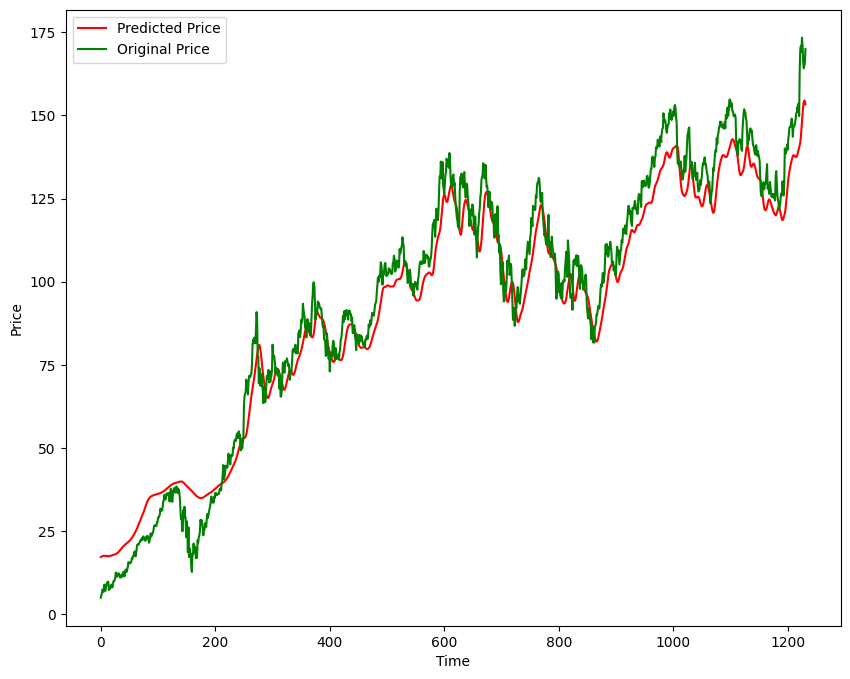

In [55]:
# Crée une nouvelle figure avec une taille de 10 pouces par 8 pouces
plt.figure(figsize=(10, 8))

# Trace les valeurs prédites en rouge avec une étiquette 'Predicted Price'
plt.plot(y_predict, 'r', label='Predicted Price')

# Trace les valeurs réelles en vert avec une étiquette 'Original Price'
plt.plot(y, 'g', label='Original Price')

# Ajoute une étiquette à l'axe des x
plt.xlabel('Time')

# Ajoute une étiquette à l'axe des y
plt.ylabel('Price')

# Ajoute une légende pour distinguer les deux lignes
plt.legend()

# Affiche le graphique
plt.show()